In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

In [7]:
tdf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\train.csv")
tedf= pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\test.csv")

In [17]:
tdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
tedf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [101]:
tdf.dtypes[tdf.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

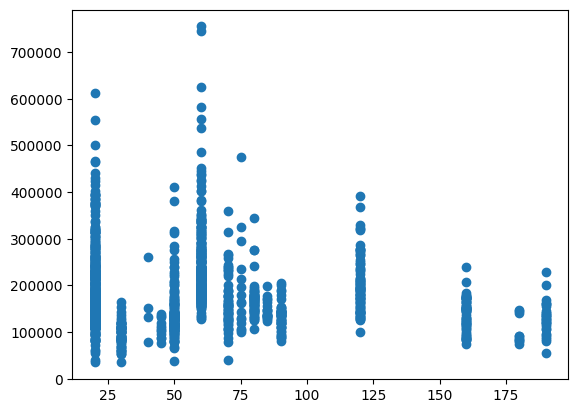

In [23]:
plt.scatter(x='MSSubClass',y='SalePrice',data=tdf)

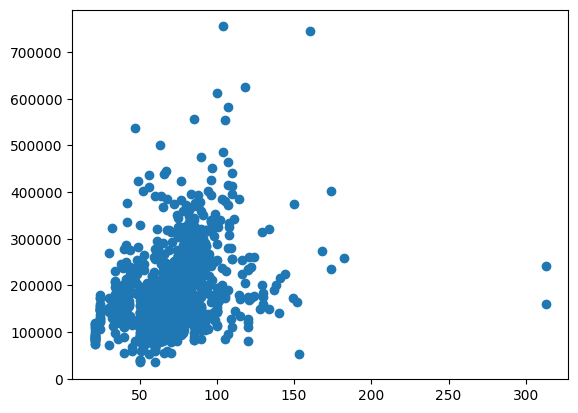

In [27]:
plt.scatter(x='LotFrontage',y='SalePrice',data=tdf)

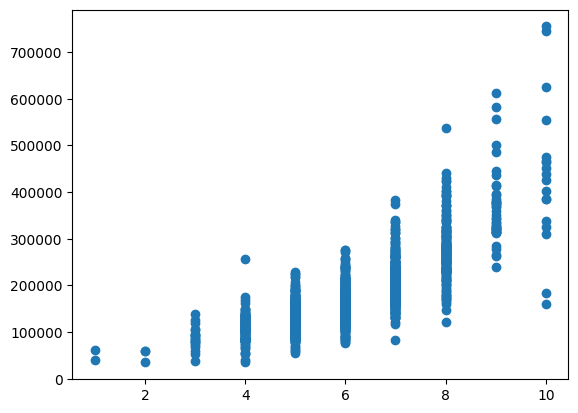

In [47]:
plt.scatter(x='OverallQual',y='SalePrice',data=tdf)

In [55]:
pd.set_option('display.max_rows', None)
tdf.query('OverallQual==8')
# 524,692,1299,1183,458,770

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
32,33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000
47,48,20,FV,84.0,11096,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,249700
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500


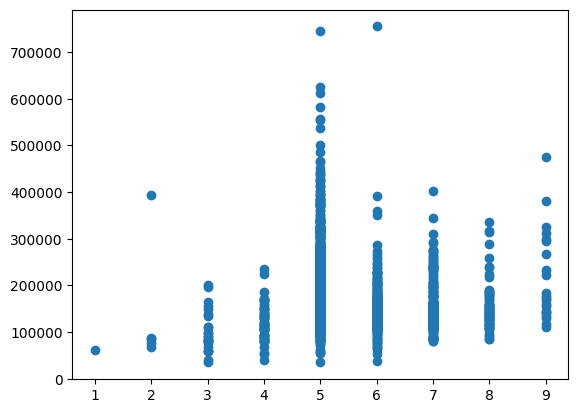

In [57]:
plt.scatter(x='OverallCond',y='SalePrice',data=tdf)

In [67]:
pd.set_option('display.max_rows', None)
tdf.query('OverallCond==5 & SalePrice>700000')
#379,692, 1182

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


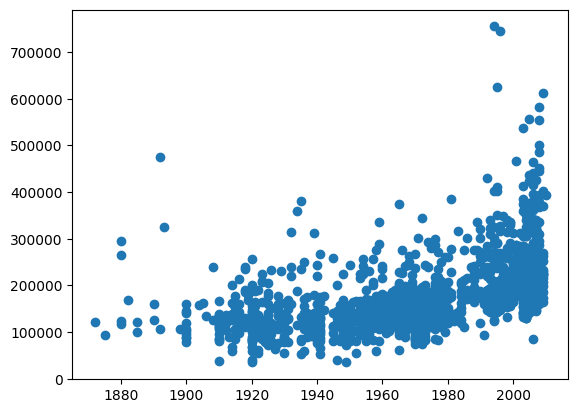

In [69]:
plt.scatter(x='YearBuilt',y='SalePrice',data=tdf)

In [75]:
tdf.query('YearBuilt>1980 & SalePrice>700000')
#186, 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [31]:
tdf.query('LotFrontage>300')
#drop 935 and 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


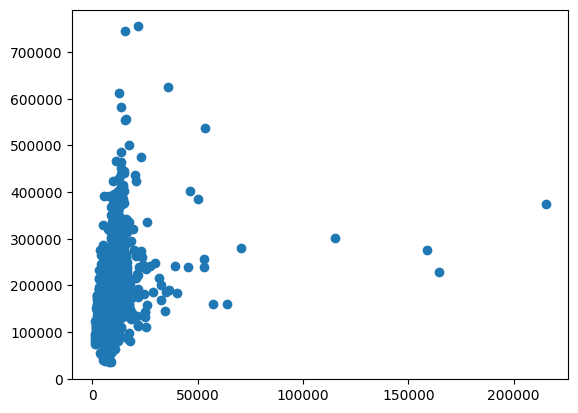

In [83]:
plt.scatter(x='LotArea',y='SalePrice',data=tdf)

In [37]:
tdf.query('LotArea>100000')
#drop 250 314 336 707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [45]:
pd.Series(stats.zscore(tdf['LotArea'])).sort_values().tail(4)

706    10.486449
249    14.881285
335    15.448542
313    20.518273
dtype: float64

Original dataset shapes:
Training data: (1460, 81)
Test data: (1459, 80)

Outlier Removal Results:
Original size: 1460
After removing outliers: 1399
Outliers removed: 61 (4.2%)
Lower bound: $3,937.50
Upper bound: $340,037.50

SalePrice Statistics Comparison:
Statistic       Original        Cleaned        
---------------------------------------------
Count           1460            1399           
Mean            $180,921        $170,237       
Median          $163,000        $159,500       
Std Dev         $79,443         $59,230        
Min             $34,900         $34,900        
Max             $755,000        $340,000       


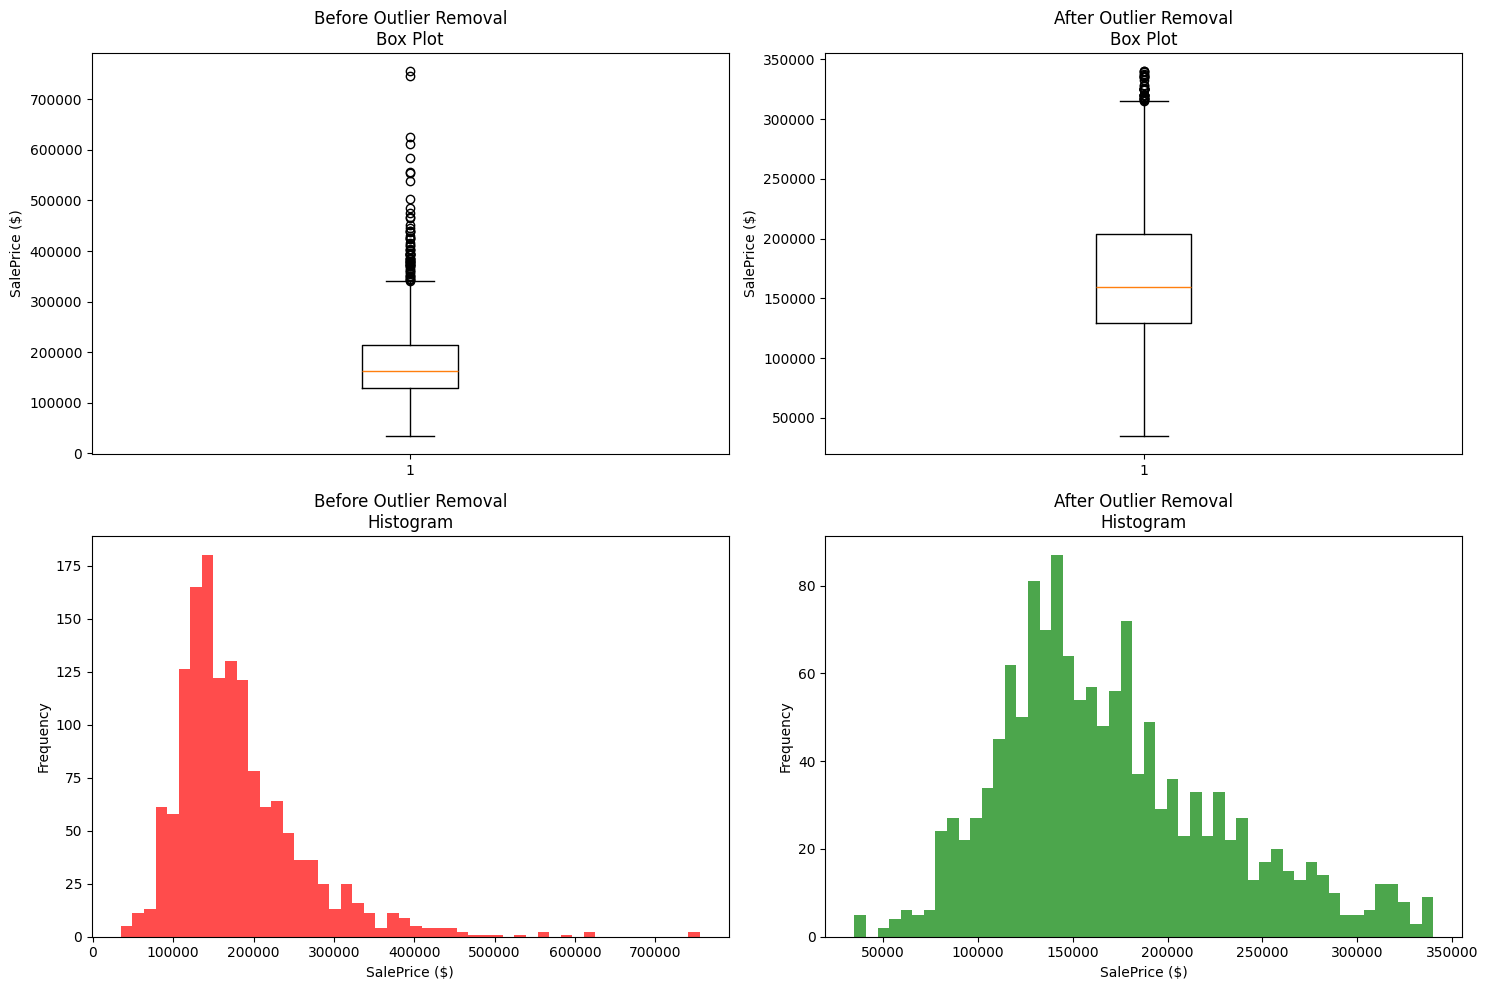


Missing values in cleaned training data:
LotFrontage      256
Alley           1308
MasVnrType       861
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1393
Fence           1122
MiscFeature     1345
dtype: int64

Final dataset shapes:
Cleaned training data: (1399, 81)
Test data (unchanged): (1459, 80)


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
tdf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\train.csv")
tedf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\test.csv")

print("Original dataset shapes:")
print(f"Training data: {tdf.shape}")
print(f"Test data: {tedf.shape}")

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column='SalePrice'):
    """
    Remove outliers using IQR method based on SalePrice
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create mask for non-outliers
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    df_clean = df[mask].copy()
    
    print(f"\nOutlier Removal Results:")
    print(f"Original size: {len(df)}")
    print(f"After removing outliers: {len(df_clean)}")
    print(f"Outliers removed: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")
    print(f"Lower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    
    return df_clean

# Remove outliers from training data only (test data doesn't have SalePrice)
tdf_clean = remove_outliers_iqr(tdf, 'SalePrice')

# Display SalePrice statistics before and after cleaning
print(f"\nSalePrice Statistics Comparison:")
print(f"{'Statistic':<15} {'Original':<15} {'Cleaned':<15}")
print("-" * 45)
print(f"{'Count':<15} {len(tdf):<15} {len(tdf_clean):<15}")
print(f"{'Mean':<15} ${tdf['SalePrice'].mean():<14,.0f} ${tdf_clean['SalePrice'].mean():<14,.0f}")
print(f"{'Median':<15} ${tdf['SalePrice'].median():<14,.0f} ${tdf_clean['SalePrice'].median():<14,.0f}")
print(f"{'Std Dev':<15} ${tdf['SalePrice'].std():<14,.0f} ${tdf_clean['SalePrice'].std():<14,.0f}")
print(f"{'Min':<15} ${tdf['SalePrice'].min():<14,.0f} ${tdf_clean['SalePrice'].min():<14,.0f}")
print(f"{'Max':<15} ${tdf['SalePrice'].max():<14,.0f} ${tdf_clean['SalePrice'].max():<14,.0f}")

# Optional: Visualize the outlier removal effect
def visualize_outlier_removal(df_original, df_clean, column='SalePrice'):
    """Visualize the effect of outlier removal"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Box plots
    axes[0, 0].boxplot(df_original[column])
    axes[0, 0].set_title('Before Outlier Removal\nBox Plot')
    axes[0, 0].set_ylabel('SalePrice ($)')
    
    axes[0, 1].boxplot(df_clean[column])
    axes[0, 1].set_title('After Outlier Removal\nBox Plot')
    axes[0, 1].set_ylabel('SalePrice ($)')
    
    # Histograms
    axes[1, 0].hist(df_original[column], bins=50, alpha=0.7, color='red')
    axes[1, 0].set_title('Before Outlier Removal\nHistogram')
    axes[1, 0].set_xlabel('SalePrice ($)')
    axes[1, 0].set_ylabel('Frequency')
    
    axes[1, 1].hist(df_clean[column], bins=50, alpha=0.7, color='green')
    axes[1, 1].set_title('After Outlier Removal\nHistogram')
    axes[1, 1].set_xlabel('SalePrice ($)')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Show visualization
visualize_outlier_removal(tdf, tdf_clean)

# Alternative: More aggressive outlier removal using Z-score
def remove_outliers_zscore(df, column='SalePrice', threshold=3):
    """Remove outliers using Z-score method"""
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    df_clean = df[z_scores < threshold].copy()
    
    print(f"\nZ-Score Outlier Removal (threshold={threshold}):")
    print(f"Original size: {len(df)}")
    print(f"After removing outliers: {len(df_clean)}")
    print(f"Outliers removed: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")
    
    return df_clean

# Alternative cleaning method (uncomment if you want to try)
# tdf_clean_zscore = remove_outliers_zscore(tdf, 'SalePrice', threshold=3)

# Check for any missing values in cleaned data
print(f"\nMissing values in cleaned training data:")
missing_values = tdf_clean.isnull().sum()
print(missing_values[missing_values > 0])

# Save cleaned data (optional)
# tdf_clean.to_csv('train_cleaned.csv', index=False)
# print(f"\nCleaned training data saved as 'train_cleaned.csv'")

print(f"\nFinal dataset shapes:")
print(f"Cleaned training data: {tdf_clean.shape}")
print(f"Test data (unchanged): {tedf.shape}")

# Now you can use tdf_clean for your analysis and modeling
# The test data (tedf) remains unchanged as it doesn't have SalePrice for outlier detection

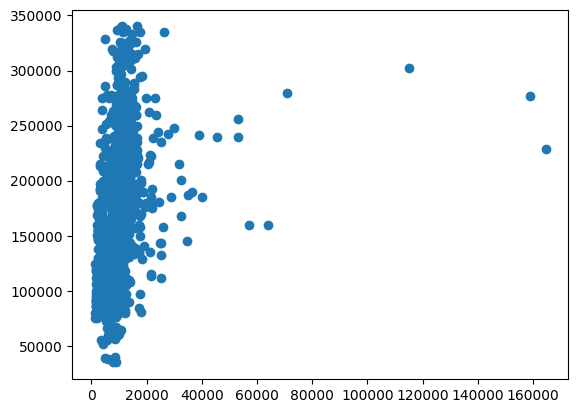

In [99]:
plt.scatter(x='LotArea',y='SalePrice',data=tdf_clean)

In [105]:
tdf.select_dtypes(include=['object', 'category']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [107]:
import pandas as pd
from scipy import stats
import numpy as np

# Load datasets
tdf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\train.csv")
tedf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\test.csv")

# Categorical columns
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
            'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
            'SaleType', 'SaleCondition']

# Encode categorical data using one-hot encoding
tdf_encoded = pd.get_dummies(tdf, columns=cat_cols, drop_first=True)

# Remove outliers based on SalePrice z-scores
z_scores = np.abs(stats.zscore(tdf_encoded['SalePrice']))
mask = z_scores < 3
tdf_clean = tdf_encoded[mask]

# Save cleaned data
tdf_clean.to_csv('tdf_clean.csv', index=False)

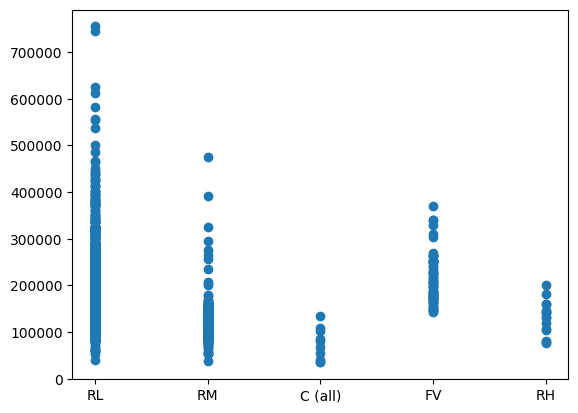

In [109]:
plt.scatter(x='MSZoning',y='SalePrice',data=tdf)

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load datasets from Kaggle directory
tdf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\train.csv")
tedf = pd.read_csv(r"C:\Users\hegde\OneDrive\Documents\house-prices-advanced-regression-techniques\test.csv")

# Categorical columns
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
            'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
            'SaleType', 'SaleCondition']

# Encode categorical data and remove outliers
tdf_encoded = pd.get_dummies(tdf, columns=cat_cols, drop_first=True)
z_scores = np.abs(stats.zscore(tdf_encoded['SalePrice']))
tdf_clean = tdf_encoded[z_scores < 3]

# Prepare test data
tedf_encoded = pd.get_dummies(tedf, columns=cat_cols, drop_first=True)
tedf_encoded = tedf_encoded.reindex(columns=tdf_clean.columns.drop('SalePrice'), fill_value=0)

# Handle missing values
tdf_clean = tdf_clean.fillna(tdf_clean.median(numeric_only=True))
tedf_encoded = tedf_encoded.fillna(tedf_encoded.median(numeric_only=True))

# Features and target
X = tdf_clean.drop('SalePrice', axis=1)
y = tdf_clean['SalePrice']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(tedf_encoded)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Check model accuracy with cross-validation
cv_scores = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(cv_scores)
print(f'Cross-validated RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})')

# Predict on test set
test_predictions = model.predict(X_test_scaled)

# Save predictions to savesub.csv
submission = pd.DataFrame({'Id': tedf['Id'], 'SalePrice': test_predictions})
submission.to_csv('savesub.csv', index=False)

Cross-validated RMSE: 24446.56 (+/- 5253.37)


In [3]:
import sys
!{sys.executable} -m pip install scipy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\hegde\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [123]:
import os
print(os.path.abspath('savesub.csv'))

C:\Users\hegde\savesub.csv


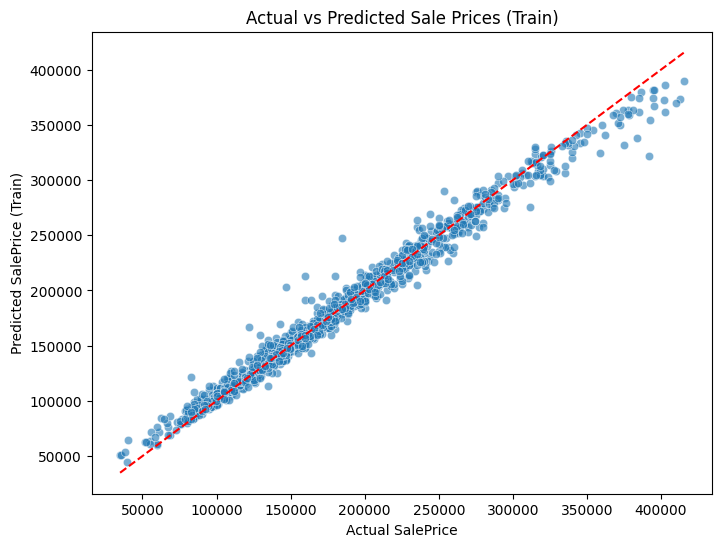

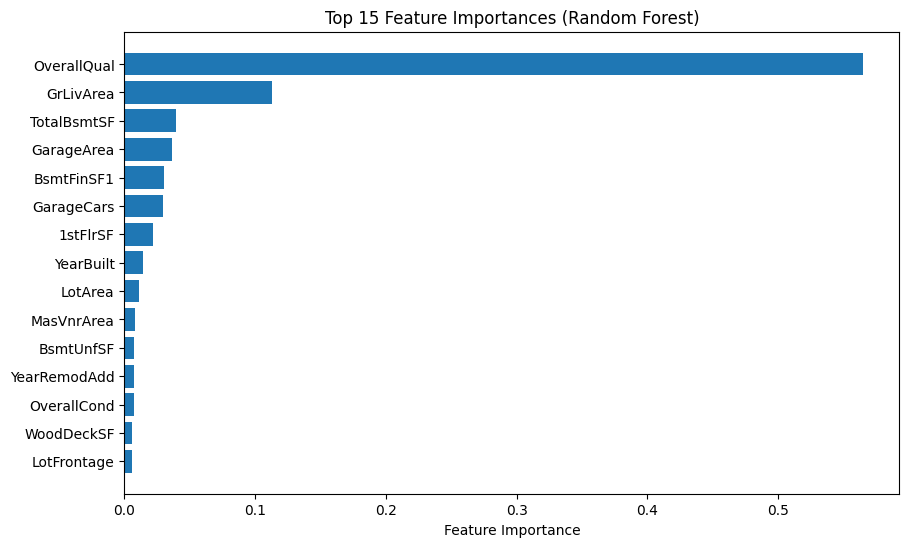

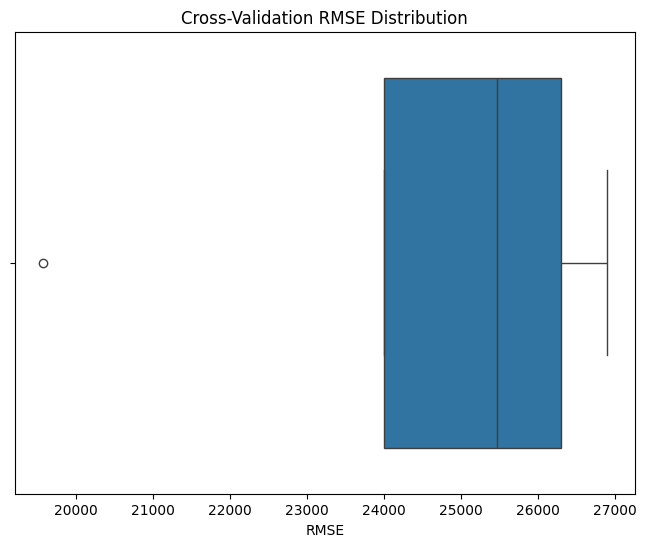

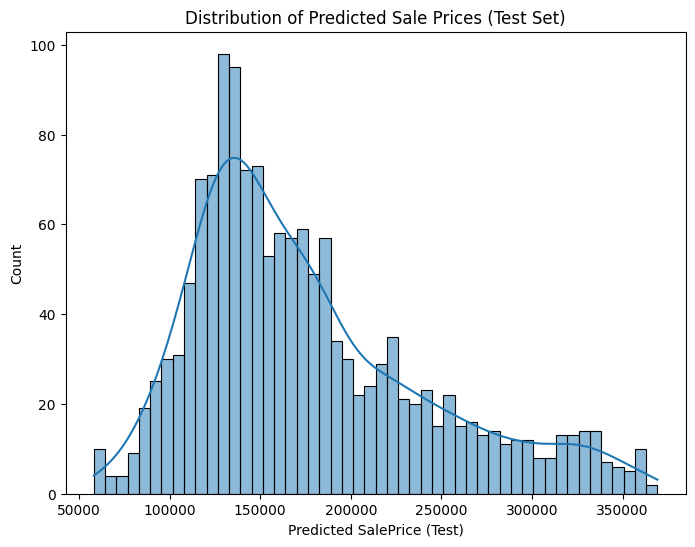

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of actual vs predicted values
y_pred_train = model.predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred_train, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (Train)")
plt.title("Actual vs Predicted Sale Prices (Train)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")  # diagonal line
plt.show()

# 2. Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 important features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

# 3. Cross-validation RMSE distribution
plt.figure(figsize=(8,6))
sns.boxplot(x=rmse_scores)
plt.xlabel("RMSE")
plt.title("Cross-Validation RMSE Distribution")
plt.show()

# 4. Predicted test set distribution
plt.figure(figsize=(8,6))
sns.histplot(test_predictions, bins=50, kde=True)
plt.xlabel("Predicted SalePrice (Test)")
plt.title("Distribution of Predicted Sale Prices (Test Set)")
plt.show()
